# k-means clustering

## Task 1: Prepare two datasets

### Task 1.1: Small dataset

For the small dataset chosen and implemented here, the following considerations were made:
- The dataset needs to be small enough to carry out k-means clustering using pen and paper easily
- It should have an 'obvious' correct answer, i.e., an optimal solution that can be recognised by a human easily. This is for a quick sanity check, and also to ensure that an existing k-means algorithm (for example, one available via scikit learn) produces the same results for k-clusters regardless of the initial centroids chosen. Note that the cluster labelling will be different when comparing the algorithm implemented in this coursework and a reference algorithm, but it's more important that the datapoints are clustered correctly with the same final centroids.
- The dataset will be used to test boundary conditions:
    - k = 1: All the datapoints in one cluster, and calculate the centroid
    - k = n: Each datapoint is a cluster, and the co-ordinate of the datapoint is the same as the centroid of the cluster

The implementation of this small dataset is given below:

In [150]:
import numpy as np
import matplotlib.pyplot as plt

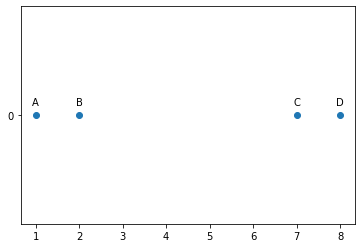

In [151]:
small_dataset = {'A':[1,0], 'B':[2,0], 'C': [7,0], 'D': [8,0]}

x, y, labels  = [item[0] for item in small_dataset.values()], [item[1] for item in small_dataset.values()], [item for item in small_dataset.keys()]

plt.scatter(x,y)
plt.yticks(range(0,1))
for xs,ys,k in zip(x,y,labels):
    #print(xs,ys,k)
    plt.annotate(k, (xs,ys), textcoords="offset points", xytext=(0,10), ha='center') #label the scatter plot points

As it can be seen from the above plot, the small dataset has very obvious groupings for k = 2: A and B in group 1, and C and D in group 2. The data is only in one dimension (preventing any issues with symmetry in 2-d, for example k=2 for a dataset with 4 points forming a rectangle), and the clusters are far apart to prevent any overlapping issues. Thus, this dataset will be suitable for a k-means implementation as it is repeatable. The centroids for these groups will be at $c_1 = (1.5,0)$ and $c_2 = (7.5,0)$. This will be shown in the next section using k-means but is self evident by just looking at the graph, fulfilling the consderation of being obvious enough for a quick sanity check. In addition, for k = 2, performing k-means using an existing reference algorithm (such as the one from scikit learn module) should produce repeatable results (as far as repeatedly converging on the same centroid values and groupings are concerned, i.e., not the cluster labels which can be random) for this dataset. This will be tested in a later section. 

### Task 1.2: Large dataset

For the large dataset, a pre-processed csv file was obtained from https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition which contains epileptic seizure detection data. The following highlighted sections is from the above linked source describing the dataset:

*`The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.`*

*`We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.`*

*`The response variable is y in column 179, the Explanatory variables X1, X2, …, X178`*

*`y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:`*

*`5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open`*

*`4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed`*

*`3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area`*

*`2 - They recorder the EEG from the area where the tumor was located`*

*`1 - Recording of seizure activity`*

*`All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.`*

*`This Dataset collect from UCI Machine Learning Repository`*

The y column is the label based on 178 features for 11500 rows. This dataset will be modified to drop the y label column and use the X1 - X178 columns to test the k-means algorithm that will be implemented in this notebook. The cluster centroids generated by the algorithm will be compared to the clusters generated by an existing reference algorithm (Kmeans - scikit learn).

## Task 2: Apply k-means clustering on paper

To implement k-means, the following steps need to be carried out:

   1. **Choose k no. of clusters** for a dataset with n points (in the form $[[x_1, y_1, z_1,...],[x_2,y_2,z_2,...],...,[x_n,y_n,z_n...]]$), (Note: If k > n or k = 0, clustering is not possible).
   2. **Initialisation** of centroids $c_1(x_{m1}, y_{m1},...$), $c_2(x_{m2}, y_{m2}...)$,...$c_k(x_{mk}, y_{mk}...)$ - Randomly choose k points from n to be the initial centroids
   3. **Centroid - object distance determination** - Compute the distance of each data point to the centroids using euclidean distances, i.e, $\sqrt{(x_1 - x_{m1})^2 + (y_1 - y_{m1})^2 + ...}$
   4. **Group** the datapoints based on the least distance from the centroid
   5. For each group created, **get new centroid coordinates** by calculating the mean of the data in each groups
   6. Repeat 3, 4, and 5 until there is no change in the groups, i.e., the centroids calculated in the latest iteration are no different from the previous iteration
   7. Perform multiple iterations of 1-6 and choose the best iteration: where the total sum of all the distances of the datapoints to their respective centroids is minimum 
   
For the small dataset presented in Section 1, the above algoirthm can be applied as follows (for k = 2):

   1. k = 2, n = 4 : A$(1,0)$, B$(2,0)$, C$(7,0)$, D$(8,0)$ 
   2. Choose $c_1 = (1,0)$ and $c_2 = (2,0)$ as initial centroids
   3. Object - centroid distance $D^{iteration}$:<br>
       >**Iteration 0:**<br>
       >&emsp;&emsp;&emsp;$\begin{matrix} A & B & C & D \end{matrix}$<br>
       >$D^0 = \begin{bmatrix} \\ 0 & 1 & 6 & 7 \\ 1 & 0 & 5 & 6 \end{bmatrix}$<br>
       Row 1 of the above matrix is the distance from centroid $c_1$, and row 2 is the distance from centroid $c_2$ 
   4. Looking at the minimum distances, the points are grouped into:<br>
       >Group 1: A and <br>
       >Group 2: B, C, D
   5. Centroid calculation:<br>
       >$c_1$ for group 1 remains unchanged: 
       >$c_1 = (1,0)$<br>
      Centroid $c_2$ for group 2 is calculated by:
       >$c_2 = \left(\frac{2 + 7 + 8}{3},\frac{0 + 0 + 0}{3}\right) = (5.67,0)$
   6. Object - centroid distance $D^{iteration}$:<br>
       >**Iteration 1:**<br>
       >&emsp;&emsp;&emsp;$\begin{matrix} A & & B && C && D \end{matrix}$<br>
       >$D^1 = \begin{bmatrix} \\ 0 & 1 & 6 & 7 \\ 4.6 & 3.6 & 1.3 & 2.3 \end{bmatrix}$<br>
   7. Looking at the minimum distances, the points are grouped into:<br>
       >Group 1: A, B and <br>
       >Group 2: C, D
   8. Centroid calculation:<br>
       >$c_1$ for group 1: $c_1 = \left(\frac{1 + 2}{2},\frac{0 + 0}{2}\right) = (1.5,0)$<br>
      Centroid $c_2$ for group 2 is calculated by:
       >$c_2 = \left(\frac{7 + 8}{2},\frac{0 + 0}{2}\right) = (7.5,0)$
   9. Object - centroid distance $D^{iteration}$:<br>
       >**Iteration 2:**<br>
       >&emsp;&emsp;&emsp;$\begin{matrix} A & & B && C && D \end{matrix}$<br>
       >$D^2 = \begin{bmatrix} \\ 0.5 & 0.5 & 5.5 & 6.5 \\ 6.5 & 5.5 & 0.5 & 0.5 \end{bmatrix}$<br>
   10. Looking at the minimum distances, the groups remain unchanged:<br>
       >Group 1: A, B and <br>
       >Group 2: C, D
   11. Centroid calculation:<br>
       >$c_1$ for group 1: $c_1 = \left(\frac{1 + 2}{2},\frac{0 + 0}{2}\right) = (1.5,0)$<br>
      Centroid $c_2$ for group 2 is calculated by:
       >$c_2 = \left(\frac{7 + 8}{2},\frac{0 + 0}{2}\right) = (7.5,0)$<br>
       Since the centroids remain unchanged as well, the optimum solution has been reached.

The above algorithm reached the optimum solution for k=2 after two iterations. This was dependent on the initial k values that were chosen. Choosing different combinations of initial centroids (for k =2 for this dataset only) will only affect the number of iterations and not the final solution. Note that 'iterations' here refers to the loop entered after choosing k centers at random, and not the overall iteration, where the whole process is repeated with different random k values every cycle. The cycle was not repeated here as it is tedious to put it on paper, but the algorithm that will be implemented in task 4 will have this feature. It is important to note that the above algorithm provides a repeatable optimal solution for this particular dataset with the conditions defined and it does not mean that this will be the case for all kinds of datasets.

If the above algorithm was used for this dataset for k = 3, depending on the initial values chosen, there are two optimal solutions:
>Group 1: A; Group 2: B; and Group 3: C,D with centroids: (1,0),(2,0),(7.5,0) and <br>
>Group 1: A, B; Group 2: C; Group 3: D with centroids: (1.5,0),(7,0),(8,0)

Please note that group labels are arbitrary and hence different combinations of labels can be generated when implementing this as a program but the optimal solution will be one of the two above.

Similarly, for k = 1, all data points will be in one group with the centroid as (4.5, 0). For k = 4, the solution is 4 groups: A, B, C, and D with centroids the same as the coordinates of A, B, C, and D.

## Task 3: Create a test harness

This section will define the expected tests and results for the k-means algorithm implemented in Task 4. Please note that the code block is an aspirational test plan written in combination of text and pseudocode (as the algorithm doesn't exist at the point of writing this). The actual tests that can be run will be integrated with the implementation in Task 4. Ideally, the actual tests will just be a straight translation of pseudocode but it's expected that some differences will be present.

In [152]:
# Test plan:

# We will divide testing into 4 sections:

# - Unit testing: Tests for individual functions using dummy data, the solution of which is known and easily checked
# - Integration tests: Tests for functions calling other functions or classes dependent on other classes, again using dummy data that can
# be easily checked on pen and paper for sanity
# - Overall implementation comparison with existing k-means algorithms using existing libraries such as scikit learn using the same datasets
# - Testing for time complexity and algorithmic complexity

# data = [[1,0],[2,0],[7,0],[8,0]]

# Expected unit tests:
# - read_from_file('file_name.csv') == imports csv data as numpy arrays
# - calc_cetroid_coord([1,0], [2,0]) == [1.5,0] #calculates the mean essentially
# - calc_dist(data, [[1,0],[2,0]]) == [[0, 1, 6, 7],[1, 0, 5,6]] #calculates euclidean distance of the centroids from the data points
# - get_min_dist(data, [[0, 1], [1, 0], [6, 5], [7, 6]]) == [[0,0],[1,0],[1,5],[1,6]] # returns [[group, min dist]] 
# - k_clusters_random(data, k =2) == randomly chooses and returns two elements from data - initial centroids
# - get_groups(data, [0, 1, 1, 1]) == {'Group 0': [[1,0]], 'Group 1': [[2,0], [7,0], [8,0]]}

# Expected integration tests:
# data = [[1,0],[2,0],[7,0],[8,0]] 
# - k_means(data, k =2) == cluster 1: (1.5, 0); cluster 2: (7.5, 0)
# - k_means(data, k =1) == cluster 1: (4.5, 0)
# - k_means(data, k =4) == cluster 1: (1, 0); cluster 2: (2, 0); cluster 3: (7, 0); cluster 4: (8, 0)

#Overall implementation comparison:
# The small dataset will be tested using the scikit learn Kmeans function - the results should converge to the same centroids (for k =2) regardless 
#of the initial k chosen at random
# The large dataset will be tested in a similar way. However, it is not known if there is a clear solution that the algorithm will converge on. 
#Multiple iterations can produce multiple
# solutions. The large dataset has >11000 rows (datapoints), and since we want to only create 5 clusters, it will be really difficult to generate 
#identical centroid clusters using our algorithm and the scikit algorithm. 

#Time and algorithm complexity
# Run the same dataset for different number of iterations, different k
# Increase the dataset size and repeat above
# Time the implementations and analyse  


## Task 4: Implement k-means clustering in Python

### Algorithm implementation and testing on small dataset:

In [2]:
# Helper functions

import datetime as dt

def timer(func):
    def wrapper_timer(*arg, **kwargs):
        start = dt.datetime.now()
        value = func(*arg, **kwargs)
        end = dt.datetime.now()
        print('Time taken: ', end - start)
        return value
    return wrapper_timer

def write_to_file(filename, dataset, mode = 'w', delimiter = ','):
    """Writes dataset of format [[x1,y1,z1...],[x2,y2,z2...],..] to a file"""
    with open(filename, mode) as data:
        data_new = []
        for row in dataset:
            line = ''
            for col in row:
                line = line + str(col) + ','
            data_new.append(line[:-1] + '\n')
        data.writelines(data_new)

In [3]:
import numpy as np
from numpy.random import default_rng

class k_means:
    def __init__(self, filename, k):
        """I perform k_means clustering with k initial random centers chosen (or set the seed if you don't want random) . I only read csv files with data and no headers/\
        other junk so please dont feed me anything else. Once you have initialised, you need to run .calc_kmeans(). Then you will have access to the data for \
        your clustering such as initial centroids (.init_centroids), final centroids (.centroids), groups (.groups), labels (.labels) etc."""
        self.filename = filename
        self.description = 'Performs k-means clustering'
        self.file_op = self.File_op(self.filename)
        self.file_op.does_file_exist()
        self.k_value = k #k needs to be defined by the user when instantiating k_means
        
        
    class File_op:
        def __init__(self, filename):
            self.filename = filename
            self.description = 'I read csv files and get data into python to be used for k-means clustering'
        
        def does_file_exist(self):
            try:
                f = open(self.filename)
            except FileNotFoundError:
                print("Note: File not found. Use the 'write_to_file' helper function with a dataset of format [[x1,y1,z1..],",\
                      "[x2,y2,z2,...],..]to create a file with the appropriate dataset. Or else, provide a valid csv datafile.")
                return 0 #for unit testing
            else:
                f.close()
                return 1 #for unit testing
        
        def process_line(self, line, delimiter):
            """takes a string input (consisting of numbers), strips the trailing spaces, splits it at the delimiter, and converts to a list
            of integers"""
            line = line.rstrip().split(delimiter)
            return [float(item) for item in line]
        
        def read_from_file(self, delimiter = ','):
            """reads the contents of the csv and returns a list of lists, where each list is a row in the csv. The csv should contain numbers only, 
            seperated by commas. Each row is a data point or an item. Each column is a feature of the datapoints"""
            with open(self.filename) as f:
                try: 
                    line1 = self.process_line(f.readline(),',') 
                    f.seek(0)
                except:
                    print('The first row of the file seems to be a header. Please ensure that the csv file only contains data (in numeric format) and no \
                    labels or categories or anything that is not the data upon which you wish to perform k-means clustering')
                    raise
                else:                          
                    return np.array([self.process_line(line, delimiter) for line in f.readlines()])
    
    def k_initialisation(self, rng = default_rng()):
        """gets the dataset and returns the initial random centroids chosen. uses the numpy rng function."""
        self.dataset = self.file_op.read_from_file() #gets dataset and creates dataset instance
        init_centroids = [] #create an empty list to store the initial centroids
        k_found = 0 #counter
        #use below loop to randomly choose k points (initial centroids) from the dataset and ensure there are no duplicates 
        while k_found < self.k_value: #carry out this loop until all k centroids are found
            k_rand = list(self.dataset[rng.integers(0,len(self.dataset))]) #choose an index in dataset at random and get the value at that index
            if k_rand not in init_centroids: 
                k_found += 1
                init_centroids.append(k_rand)
        self.init_centroids = np.array(init_centroids)
        return self.init_centroids
    
    def obj_cent_dist(self, dataset, centroids):
        """calculate the euclidean distance between every datapoint and every centroid """
        return np.array([np.sqrt(sum(((dataset - i)**2).T)) for i in centroids])#each row corresponds to a centroid, and each column is a datapoint, i.e., 
                                                                                #row index 2, column index 3 indicates the distanceof point 4 from centroid 3
    
    def group_data(self, dataset, obj_cent_dist_data):
        """based on minimum distances found, assigns every datapoint to the centroid closest to it"""
        #transpose the array so each row corresponds to a datapoint. get the index of the minimum value in the row - this is the centroid the data point belongs to
        labels = [np.where(obj_cent_dist_data.T[i] == obj_cent_dist_data.T[i].min()) for i in range(len(obj_cent_dist_data.T))]
        labels = [labels[i][0][0] for i in range(len(labels))] #note, if a point has the same distance from multiple centroids, the algorithm chooses the first centroid 
        labeled_data = np.insert(dataset, dataset.shape[-1], labels, axis = 1) #create a new dataset with the cluster labels in the last column
        labeled_data_sorted = labeled_data[labeled_data[:,-1].argsort()] #sort the data based on last column ascending (labels)
        grouped_data = np.split(labeled_data_sorted[:,:-1], np.unique(labeled_data_sorted[:, -1], return_index=True)[1][1:])#split the data into groups when the 
        #label changes in the column
        return (labels, grouped_data)
        
    def calc_centroids(self, grouped_data):
        "calculate centroid coordinates by averaging the coordinates of data points belonging to a group"
        return np.array([group.mean(axis = 0) for group in grouped_data])
    
    @timer
    def calc_kmeans(self, rand_state = 'default', num_iter = 10):
        """Carry out k_means clustering. num_iter defines the number of times the core algorithm for clustering is repeated. The best iteration is chosen. \
        rand_state is default unless specified. This seeds the rng used for initial centroids"""
        rng = default_rng() if rand_state == 'default' else default_rng(rand_state) #create random number generator
        #create empty lists to store data for each overall iteration
        init_cent = []
        cent = []
        dist = []
        lab =[]
        gr_data = []
        iterations = [] #no. of loops taken to converge to a solution. Note: this is not the iteration for the outer loop (num_iter), but the while loop 
                        #carrying out the clustering.
        sum_dist =[] #sum of centroid distances (to datapoint belonging to the centroid cluster) for each iteration
        for i in range(num_iter): #perfrom no. of overall iterations specified, 10 is default
            # initialise
            centroids = self.k_initialisation(rng)
            prev_centroids = np.full(centroids.shape, np.inf) #creating a placeholder...tried using np.empty but it had unexpected behaviour. 
            d_local = [] #stores list of sum of distances to centroid (for current iteration, from datapoints belonging to the centroid) 
            it = 0
            while not np.allclose(prev_centroids, centroids): #while the current centroids and previous centroids are not the same, carry out the following
                it += 1 # increment the iteration. Note that the iteration will never be 0 because the prev_centroids in the first instance is a dummy array
                prev_centroids = centroids
                distances = self.obj_cent_dist(self.dataset, centroids) #calculate distance to the curent centroids
                labels, grouped_data = self.group_data(self.dataset, distances) #group the data based on the minimum distances and label
                centroids = self.calc_centroids(grouped_data) #calculate the new centroids based on the groups
            #store the sum of the distances of each centroid found to each datapoint in the cluster belonging to the centroid. To be used to calculate the best iteration
            for k in range(len(centroids)):
                #find distance to centroid, remember using only local data points belonging to the centroid. Also, need to reshape 1d array to 2d.
                d_local.append(np.sum(self.obj_cent_dist(grouped_data[k],np.reshape(centroids[k],(1,centroids[k].shape[0])))))
            sum_dist.append(sum(d_local)) #sum all the distances (total distance for centroid 1 + total distance for centroid 2 etc.) to get the total distance for 
                                            #this iteration.
            #append the lists created before the for loop to store all values generated in each iteration
            init_cent.append(self.init_centroids)
            cent.append(centroids)
            dist.append(distances)
            lab.append(labels)
            gr_data.append(grouped_data)
            iterations.append(it)
        #get the best iteration: the best iteration is the one where the total sum of all the distances from datapoints to their respective centroids is minimum ,i.e.,
        #if in one iteration, there are 2 clusters with 10 points in one cluster and 6 points in the other cluster, the total distance that will be compared with the 
        #other iterations, is the combined sum of the sum of the distances of the 10 points to their centroid and the sum of the distances of the 6 points to their centroid.
        min_index = sum_dist.index(min(sum_dist)) #get index of the iteration where sum of all distances is minimum
        self.centroids = cent[min_index]
        self.labels = lab[min_index]
        self.groups = gr_data[min_index]
        self.num_iterations = iterations[min_index]
        self.init_centroids = init_cent[min_index]
        self.distances = dist[min_index]
        
        return
    
    #These tests are for the File_op class nested within k_means
    def unit_tests(self):
        UT_File_op = self.File_op('abc.txt')
        assert UT_File_op.filename == 'abc.txt'
        assert UT_File_op.does_file_exist() == 0 #assumes abc.txt does not exist in the workspace and hence this should return 0, i.e., file not found. 
                                                    #\If testing with a file that exists, the function will return 1 and throw an assertion error
        assert UT_File_op.process_line('  3, 5 ,7, 8  \n',',') == [3,5,7,8]   
        
    def integration_tests(self):
        UT_File_op = self.File_op('small_dataset.txt')
        assert np.array_equal(UT_File_op.read_from_file(), np.array([[1,0],[2,0],[7,0],[8,0]])) #checks the output of the read from file function

write_to_file('small_dataset.txt',[[1,0],[2,0],[7,0],[8,0]]) #create small dataset csv for kmeans
small_data_1clusters = k_means('small_dataset.txt', 1) #used for unit and integration testing - 1 clusters
small_data_2clusters = k_means('small_dataset.txt', 2) #used for unit/ integration testing - 2 clusters
small_data_3clusters = k_means('small_dataset.txt', 3) #used for unit/ integration testing - 3 clusters        
small_data_4clusters = k_means('small_dataset.txt', 4) #used for unit/ integration testing - 4 clusters

def unit_tests():
    #test the k_initialisation function. Since it is random, only checking if value returnes is in the set of possible values
    assert small_data_1clusters.k_initialisation().tolist() in [[[1,0]],[[2,0]], [[7,0]], [[8,0]]] 
    np.testing.assert_array_equal(small_data_1clusters.obj_cent_dist(np.array([[1,0],[2,0],[7,0],[8,0]]),np.array([[1,0]])), [[0,1,6,7]]) #test the obj_cent_dist function
    #run the group_data function and store results for testing below
    test_label, test_group = small_data_1clusters.group_data(np.array([[1,0],[2,0],[7,0],[8,0]]), np.array([[0,1,6,7]])) 
    assert test_label == [0,0,0,0] #checking if group_data function produces the expected labels
    np.testing.assert_array_equal(test_group[0], np.array([[1,0],[2,0],[7,0],[8,0]])) #checking if group_data function produces expected group
    np.testing.assert_array_equal(small_data_1clusters.calc_centroids(test_group), np.array([[4.5,0]])) #test calc_centroids function

def integration_tests():    
    small_data_1clusters.calc_kmeans(num_iter = 100)
    small_data_2clusters.calc_kmeans(num_iter = 100)
    small_data_3clusters.calc_kmeans(num_iter = 100)
    small_data_4clusters.calc_kmeans(num_iter = 100)
    np.testing.assert_array_equal(np.sort(small_data_2clusters.centroids.flat), np.sort(np.array([[1.5,0],[7.5,0]]).flat)) #test small dataset with 2 clusters
    np.testing.assert_array_equal(small_data_1clusters.centroids, np.array([[4.5,0]])) #test small dataset with 1 clusters
    np.testing.assert_array_equal(np.sort(small_data_4clusters.centroids.flat), np.sort(np.array([[1,0],[2,0],[7,0],[8,0]]).flat)) #test small dataset with 4 clusters

# carry out comparison of centroids found using sklearn Kmeans tool. use small dataset here as there is an optimum solution regardless of randomness
from sklearn.cluster import KMeans
def sk_comparison():
    #our algorithm (the class is already instantiated outside the function):
    small_data_2clusters.calc_kmeans(num_iter = 10)
    small_data_1clusters.calc_kmeans(num_iter = 10)
    small_data_3clusters.calc_kmeans(num_iter = 10)
    small_data_4clusters.calc_kmeans(num_iter = 10)
    #sklearn Kmeans:
    small_data_sklearn_1cl = KMeans(n_clusters = 1, init = 'random')
    small_data_sklearn_1cl.fit(small_data_1clusters.dataset)
    small_data_sklearn_2cl = KMeans(n_clusters = 2, init = 'random')
    small_data_sklearn_2cl.fit(small_data_2clusters.dataset)
    small_data_sklearn_3cl = KMeans(n_clusters = 3, init = 'random')
    small_data_sklearn_3cl.fit(small_data_3clusters.dataset)
    small_data_sklearn_4cl = KMeans(n_clusters = 4, init = 'random')
    small_data_sklearn_4cl.fit(small_data_4clusters.dataset)
    
    np.testing.assert_array_equal(np.sort(np.concatenate(small_data_1clusters.centroids).flat), np.sort(small_data_sklearn_1cl.cluster_centers_.flat))
    np.testing.assert_array_equal(np.sort(np.concatenate(small_data_2clusters.centroids).flat), np.sort(small_data_sklearn_2cl.cluster_centers_.flat))
    #note: the below is expected to give an assertion error from time to time as for 3 clusters, there are 2 optimal solutions that can be found (see explanation in Task 2)
    #np.testing.assert_array_equal(np.sort(np.concatenate(small_data_3clusters.centroids).flat), np.sort(small_data_sklearn_3cl.cluster_centers_.flat))
    np.testing.assert_array_equal(np.sort(np.concatenate(small_data_4clusters.centroids).flat), np.sort(small_data_sklearn_4cl.cluster_centers_.flat))

In [155]:
unit_tests()

In [156]:
integration_tests() #carried out on the small dataset using different k clusters with 100 iterations each

Time taken:  0:00:00.123262
Time taken:  0:00:00.119203
Time taken:  0:00:00.175926
Time taken:  0:00:00.091430


In [157]:
sk_comparison()

Time taken:  0:00:00.015056
Time taken:  0:00:00.007240
Time taken:  0:00:00.006661
Time taken:  0:00:00.005225


### Testing on large dataset

The dataset described in Task 2 comes preprocessed but it still needs to be tailored slightly to use the algorithm implemented her. Specifically, the headers need to be removed, the first column needs to be discarded, and the last column (y labels) needs to be dropped. In addition, this dataset then needs to be written to csv as the program implemented here only takes a csv as an input.

In [6]:
import pandas as pd
#Download the data from kaggle (https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition?select=Epileptic+Seizure+Recognition.csv) 
#and save it as Epileptic Seizure Recognition.csv
epilepsy_df = pd.read_csv('Epileptic Seizure Recognition.csv', index_col = 'Unnamed')
epilepsy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
epilepsy_df = epilepsy_df.drop(['y'], axis = 1)
epilepsy_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [8]:
epilepsy_data = epilepsy_df.values.tolist() #convert to list of lists
write_to_file('Epilepsy_Data.csv', epilepsy_data) #write to file using the helper function

#Dataset is now ready to be used. Use k = 5 as the original dataset had 5 labels

In [4]:
#This can take up to 90 seconds to run for 10 iterations: change no. of iterations in .calc_kmeans() method to a lower number for faster implementation
epilepsy = k_means('Epilepsy_Data.csv', 5)

epilepsy.calc_kmeans(num_iter = 5)
epilepsy_centroids = epilepsy.centroids

Time taken:  0:00:38.489194


In [162]:
print(epilepsy_centroids.shape)
init_centers = epilepsy.init_centroids #store the initial centers for the solution found

(5, 178)


It can be seen that the algorithm has completed successfully and has created 5 centroids of an expected size. The instance can be interrogated to retrieve other data such as initial centroids, groups etc. However, there is no way to check if these clusters are a good or an optimal solution. It can't be compared to the groupings in the original dataset (based on the y column labels) as it is almost certain that a. more sophisticated techniques would have been used to perform the clustering, and b. the random initial k values will output different results (converge on various local optima) unless there is a global optimum solution it should always converge on. If there are multiple local optimal solutions, then there are too many possibilities for a dataset for this size. As an example, the below code tried to run the scikit learn KMeans toolkit on the epilepsy dataset 2000 times and compared the output in each iteration to the centroids generated by our algorithm above and the scikit Kmeans never converged to our solution. This can either mean that our solution is bad or there are just too many possibilities and it is heavily dependent on the initial k centers chosen.    

In [163]:
#Below code for reference only.

# epilepsy_kmeans = KMeans(n_clusters = 5, init = 'random', n_init = 1)
# epilepsy_kmeans.fit(epilepsy.dataset)

# epilepsy_centroids_scikit = epilepsy_kmeans.cluster_centers_
# i=0
# while not np.allclose(np.sort(epilepsy_centroids_scikit.flat), np.sort(np.concatenate(epilepsy_centroids).flat)):
#     if i > 2000:
#         break
#     i+=1
#     epilepsy_kmeans.fit(epilepsy.dataset)
#     epilepsy_centroids_scikit = epilepsy_kmeans.cluster_centers_
# print('Done')

One way to ensure that our algorithm is not producing poor results, is to essentially take the randomness out of the equation. The below code uses the initial centers chosen by our k_means implementation (at random) and then feeds it to the scikit learn Kmeans implementation. Thus, the scikit algorithm is starting with the same centers as our algorithm. If the algorithm implemented in this notebook is correct, the scikit algorithm should find the same centroids as our algorithm.

In [168]:
centroids_same_or_not = [] #store the truth state of the comparison of centroids
for i in range(5):
    epilepsy.calc_kmeans(num_iter = 1) #calculate kmeans using random initialisation of centers
    init_centers = epilepsy.init_centroids #store the initial centers chosen at random
    epilepsy_centroids = epilepsy.centroids 
    epilepsy_kmeans = KMeans(n_clusters = 5, init = init_centers, n_init = 1) #perform k_means using scikit learn toolkit with the initial centers fed from above
    epilepsy_kmeans.fit(epilepsy.dataset)
    epilepsy_centroids_scikit = epilepsy_kmeans.cluster_centers_
    centroids_same_or_not.append(np.allclose(np.sort(epilepsy_centroids_scikit.flat), np.sort(np.concatenate(epilepsy_centroids).flat))) #compare the centroids generated
print(centroids_same_or_not)

Time taken:  0:00:10.519682
Time taken:  0:00:07.753857
Time taken:  0:00:06.510421
Time taken:  0:00:07.286628
Time taken:  0:00:09.615020
[True, True, False, True, True]


The above result was unexpected as there was one instance where the centroids didn't match. It is unclear why this is the case as one would expect either all the values to be true or all the values to be false. However, 4 out of 5 times, the algorithms did converge on the same solution so there can be some degree of confidence in the algorithm implemented here (however, repeating the above yields different results each time). In any case, it was decided to perform the same analysis on the iris dataset:

In [20]:
#performing comparison on iris data with initial centers set to be the same for both our algorithm and scikit algorithm in each iteration 

from sklearn.datasets import load_iris
iris = load_iris()

write_to_file('iris.csv',iris.data)
iris_test = k_means('iris.csv', 3)

centroids_same_or_not_iris = []
for i in range(20):
    iris_test.calc_kmeans(num_iter = 1) #calculate kmeans using random initialisation of centers
    init_cent = iris_test.init_centroids #store the initial centers chosen at random
    iris_centroids = iris_test.centroids
    iris_scikit = KMeans(n_clusters = 3, init = init_cent, n_init = 1)
    iris_scikit.fit(iris.data)
    iris_centroids_scikit = iris_scikit.cluster_centers_
    centroids_same_or_not_iris.append(np.allclose(np.sort(iris_centroids_scikit.flat), np.sort(np.concatenate(iris_centroids).flat)))
print(centroids_same_or_not_iris)

Time taken:  0:00:00.008294
Time taken:  0:00:00.012813
Time taken:  0:00:00.048675
Time taken:  0:00:00.012952
Time taken:  0:00:00.006651
Time taken:  0:00:00.006893
Time taken:  0:00:00.005696
Time taken:  0:00:00.005864
Time taken:  0:00:00.054430
Time taken:  0:00:00.008740
Time taken:  0:00:00.006234
Time taken:  0:00:00.004175
Time taken:  0:00:00.004918
Time taken:  0:00:00.005974
Time taken:  0:00:00.067812
Time taken:  0:00:00.008161
Time taken:  0:00:00.003136
Time taken:  0:00:00.004112
Time taken:  0:00:00.006804
Time taken:  0:00:00.006750
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


The above instills more confidence in our algorithm as it repeatedly converges to the same solution as the scikit KMeans algorithm for the same initial centers. Putting the randomness back in the scikit algorithm, and comparing the results directly for this dataset: 

In [170]:
#performing comparison on iris data with initial centers set to be random for both our algorithm and scikit algorithm in each iteration 
centroids_same_or_not_iris = []
for i in range(20):
    iris_test.calc_kmeans(num_iter = 10)
    init_cent = iris_test.init_centroids
    iris_centroids = iris_test.centroids
    iris_scikit = KMeans(n_clusters = 3, init = 'random', n_init = 10)
    iris_scikit.fit(iris.data)
    iris_centroids_scikit = iris_scikit.cluster_centers_
    centroids_same_or_not_iris.append(np.allclose(np.sort(iris_centroids_scikit.flat), np.sort(np.concatenate(iris_centroids).flat)))
print(centroids_same_or_not_iris)

Time taken:  0:00:00.074331
Time taken:  0:00:00.163557
Time taken:  0:00:00.128642
Time taken:  0:00:00.136422
Time taken:  0:00:00.189110
Time taken:  0:00:00.174883
Time taken:  0:00:00.181476
Time taken:  0:00:00.130082
Time taken:  0:00:00.127992
Time taken:  0:00:00.173938
Time taken:  0:00:00.164266
Time taken:  0:00:00.125874
Time taken:  0:00:00.186919
Time taken:  0:00:00.164573
Time taken:  0:00:00.124020
Time taken:  0:00:00.116389
Time taken:  0:00:00.171744
Time taken:  0:00:00.122986
Time taken:  0:00:00.198878
Time taken:  0:00:00.132183
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


The above result proves that the algorithm produced in this notebook is fairly robust as it is repeatably comparable with the scikit algorithm. Thus we can be fairly confident in our results for the epilepsy dataset as well. Although it is strange that setting the initial centers for the scikit method produced a mixture of true and false (one would expect either all true or all false), looking into the reasons why this is the case is beyond the scope of this notebook but may be looked at in the future.

 ### Algorithmic complexity and limitations

The algorithm implemented in task 4 will always converge on a solution. This will not be a global solution most of the time but can be for some cases (such as the small dataset implemented here). This is because the crux of the algorithm is to move towards the direction where the distances of the datapoints to centroids is decreasing. The algorithm tries to find the best solution by carrying out multiple iterations (defined by the user) and finding the solution with the lowest distance overall, but there is no guarantee that the best solution will be found within those iterations specified or even the same over multiple runs (due to randomness - case in point being the epilepsy dataset that was tested before). 

The time taken by the algorithm mostly depends on (combination of all three): 

1. The size of the dataset (number of rows)
1. The no. of dimensions in the dataset (number of columns)
1. The number of clusters to be found

For the epilepsy dataset, it can be seen that for 10 iterations, the time taken was around 80 seconds on average. This equates to about 8 seconds per iteration for 11500 rows and 178 dimensions. For the iris dataset (150 rows x 4 dims), the average time per iteration is about 11 ms. For the small dataset (4 x 2), the average iteration time was around 1.1 ms. Looking at the algorithm, the most comutationally heavy seems to be the group_data function. This function performs a lot of search and sorting operations and is mostly dependendent on the number of rows and the number of centroids. 

The outer for loop has a nested for loop that calculates the overall distance of the datapoints to their respective centroids per iteration. This functionality was added later during development and hence is probably not the best way to be implemented and can be improved upon in the future. The main while loop in the code carrying out the clustering is itself devoid of any complicated loops but is dependent heavily on the numpy library within the functions it is calling.

## Task 5: Visualisation

Visualisation of the epilepsy dataset using principal component analysis (PCA) will be attempted here:

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

epilepsy = k_means('Epilepsy_Data.csv', k = 5)  
epilepsy.calc_kmeans(num_iter = 10) #perform k_means and to get labels for later
epiData = epilepsy.dataset

numComp = 2
pca = PCA(n_components = numComp)
pca.fit(epiData)

projected = pca.transform(epiData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'])

Time taken:  0:01:13.648453


In [16]:
projected = projected.assign(label = epilepsy.labels) #use the last ran instance of epilepsy kmeans and get the labels
projected

,pc1,pc2,label
0,-91.519651,-181.541189,0
1,-315.351284,-515.519269,1
2,91.303353,-39.380029,2
3,-10.353989,52.493400,2
4,-35.738042,15.480074,0
...,...,...,...
11495,-3.294506,-54.898821,0
11496,-46.367525,-699.612170,0
11497,-51.519223,-25.583307,0
11498,-45.412636,-173.858495,2


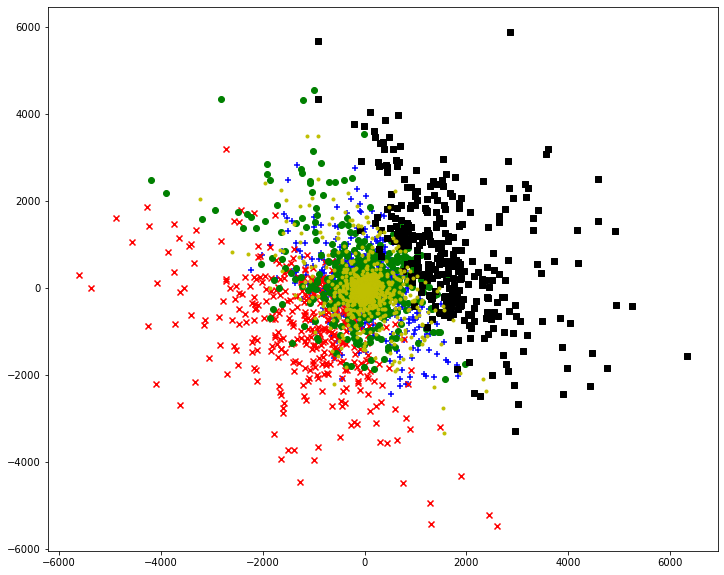

In [18]:
from mpl_toolkits import mplot3d

colors = {0:'b', 1:'r', 2:'g', 3:'k', 4:'y'}
markerTypes = {0:'+', 1:'x', 2:'o', 3:'s', 4:'.'}
    
fig = plt.figure(figsize = (12,10))
ax = plt.axes()

for label in markerTypes:
    d = projected.loc[projected.label == label]
    ax.scatter(d.pc1, d.pc2, c = colors[label], marker = markerTypes[label])

Doing the same for iris dataset: but having 3 principal components instead of 2

In [21]:
irisData = iris_test.dataset

numComp = 3
pca = PCA(n_components = numComp)
pca.fit(irisData)

projected = pca.transform(irisData)
projected = pd.DataFrame(projected,columns=['pc1','pc2', 'pc3'])
projected = projected.assign(label = iris_test.labels) #use the last ran instance of iris kmeans and get the labels
projected

,pc1,pc2,pc3,label
0,-2.684126,0.319397,-0.027915,2
1,-2.714142,-0.177001,-0.210464,2
2,-2.888991,-0.144949,0.017900,2
3,-2.745343,-0.318299,0.031559,2
4,-2.728717,0.326755,0.090079,2
...,...,...,...,...
145,1.944110,0.187532,0.177825,0
146,1.527167,-0.375317,-0.121898,1
147,1.764346,0.078859,0.130482,0
148,1.900942,0.116628,0.723252,0


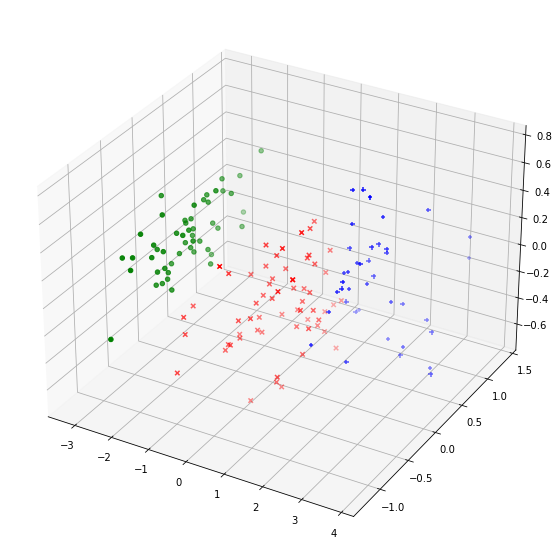

In [22]:
colors = {0:'b', 1:'r', 2:'g'}
markerTypes = {0:'+', 1:'x', 2:'o'}

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for label in markerTypes:
    d = projected.loc[projected.label == label]
    ax.scatter(d.pc1, d.pc2, d.pc3, c = colors[label], marker = markerTypes[label])